<!DOCTYPE html>
<html>
<head>
  <title>Ilora, Erjola_Business Challenge I_Pair Assignment</title>
</head>
<body>
  <h1>A1: Retiree Income Projection Assignment</h1>
  <p><strong>Name:</strong> Ilora Bandyopadhyay, Erjola Avdiaj</p>
  <p><strong>Date:</strong> 12/18/2023</p>
  <p><strong>Course:</strong> Business Challenge I</p>
  <p><strong>Program:</strong> MBAN (Cohort 2)</p>
  <p><strong>School:</strong> Hult International Business School Boston</p>
  </ol>
</body>
</html>

# Introduction
This user - friendly code can help Retiree family in Massachusetts (MA) or California (CA) to plan for the future.
The code considers Federal tax and state tax, interest from savings and IRA account and, expenses to forecast how long the savings might last.
Being straightforward and easy to understand, this code can be easily used by anybody.
The code has three sections:
* Section 1: Gives the expenses forecast
* Section 2: Gives retiree income projection for residents of MA
* Section 3: Gives retiree income projection for residents of CA

Here is the demo video on how to use the code: https://www.youtube.com/watch?v=wxSrpxelGVA

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

# Load Libraries

import pandas as pd                # data manipulation and wrangling
import numpy as np                 # numerical and scientific computing
import matplotlib.pyplot as plt    # general data visualization
import seaborn as sns              # interface for statistical visualization
import sklearn                     # for machine learning
import statsmodels.api as sm       # for statistic models
import sqlite3                     # SQL data management
import os                          # for reading working directory
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


np.random.seed(42)  # To ensure all the probabilistic things are reproducible


## Expenses Forecast
This section asks the user to enter the current annual expense and the number of years they want to look at. The output obtained is expense of each year, considering the corresponding inflation rate. The inflation rate for each year is taken by this code from the file 'Inflation rate.csv' placed in 'data' folder. The file has forecast till 2058. If required, kindly update the numbers in the following format: Year, Percentage Change. 

In [ ]:
#Calculating Expenses over the coming years
import pandas as pd

# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
inflation_rate_filename = "Inflation rate.csv"

# Read the CSV files and create backup copies
inflation_rate_df_data = pd.read_csv(data_path + inflation_rate_filename)

# Create working copies of the dataframes for analysis
inflation_rate_df = inflation_rate_df_data.copy()

# Function to calculate annual expenses for a number of years starting from the entered year
def expenses(inflation_rate_df):
    current_year = int(input("Enter the current year: ")) # takes input from the user
    annual_expenses = float(input("Enter your annual expenses: ")) # takes input from the user
    years = int(input("Enter the number of years: ")) # takes input from the user
    start_year_index = current_year - 2023
    inflation_rates = inflation_rate_df["Percentage Change"].values[start_year_index:start_year_index + years] # Refers to inflation rates from the .csv file

    for year, inflation_rate in enumerate(inflation_rates):
        adjusted_expense = annual_expenses * (1 + inflation_rate) # Calculating annual expense for each year
        print(f"Year {current_year + year}: ${adjusted_expense:.2f}") # Printing out the annual expense for each year
        annual_expenses = adjusted_expense

# Calling the function
expenses(inflation_rate_df)


Enter the current year:  12


## Federal tax
Federal tax has to be paid by everybody living in US. Following is the chart for your reference:

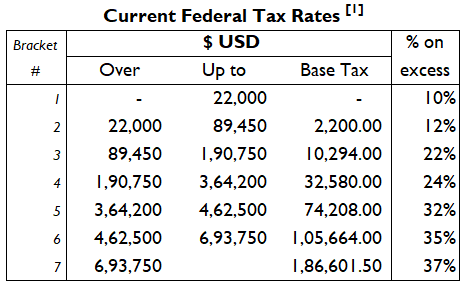


[1] Source: Department of Treasury IRS (Nov 02, 2022). Tax Rate Schedules; Schedule Y-1 If your filling status is Married filling jointly or Qualifying Widow(er), U.S. IRS Federal Tax Rates, page 7; Retrieved on Dec 7th 2023 available at: http://www.irs.gov/pub/irs-pdf/f1040es.pdf


# Retiree income projection for MA
This section gives a projection for families living in MA. The user enters the balance in savings account and IRA account and the corresponding annual interest rate and the number of years they want to see the projection for. As on output, this code gives the projection.

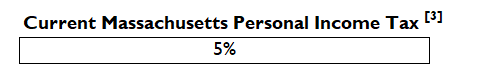

[3] Source: Massachusetts Department of Revenue (Feb 02, 2023). Personal Income Tax for Residents. Retrieved on Dec 7th 2023 available at https://www.mass.gov/info-details/massachusetts-tax-rates


In [3]:
# Calculating tax for Retiree family in MA
import pandas as pd

# Function to calculate federal tax
def calculate_federal_tax(income):
    # Federal Tax Brackets to calculate the tax
    ## This Part might be updated while there is a change in tax bracket. 
    brackets = [
        (0, 22000, 0.10),
        (22000, 89450, 0.12),
        (89450, 190750, 0.22),
        (190750, 364200, 0.24),
        (364200, 462500, 0.32),
        (462500, 693750, 0.35),
        (693750, float('inf'), 0.37)
    ]

    tax = 0
    income_remaining = income
    
    # For calculating Federal tax based on the brackets
    for lower_limit, upper_limit, rate in brackets:
        taxable_amount = min(upper_limit - lower_limit, income_remaining)
        tax += taxable_amount * rate
        income_remaining -= taxable_amount

        if income_remaining <= 0:
            break  # No more tax to calculate

    return tax

# Function to calculate MA Personal Income tax
def calculate_ma_tax(income):
    ma_tax_rate = 0.05  # Massachusetts Personal Income Tax Rate
    return income * ma_tax_rate

# Function to calculate remaining balance
def calculate_remaining_balance(current_savings, current_ira, savings_interest_rate, ira_interest_rate, annual_expenses, num_years):
    # Constants
    MONTHS_IN_YEAR = 12

    # Monthly interest rates
    monthly_savings_interest = savings_interest_rate / MONTHS_IN_YEAR
    monthly_ira_interest = ira_interest_rate / MONTHS_IN_YEAR

    # Specify the path to the datasets
    data_path = "./data/"

    # Specify the filenames of the datasets
    inflation_rate_filename = "Inflation rate.csv"

    # Read the CSV file for inflation rates
    inflation_rate_df_data = pd.read_csv(data_path + inflation_rate_filename)

    # Create working copies of the dataframes for analysis
    inflation_rate_df = inflation_rate_df_data.copy()

    # Initializing the variables
    remaining_balance = current_savings
    ira_balance = current_ira
    total_federal_tax_paid = 0  # Variable to add cumulatively federal tax over the years
    total_ma_tax_paid = 0  # Variable to add cumulatively MA state tax over the years

    for year in range(2023, 2023 + num_years):
        inflation_rate = inflation_rate_df.loc[year - 2023, 'Percentage Change']  # Fetching inflation rate for the current year
        annual_expense = annual_expenses * (1 + inflation_rate)

        for month in range(1, MONTHS_IN_YEAR + 1):
            # Calculating interest on IRA and Savings
            interest_on_ira = ira_balance * monthly_ira_interest
            interest_on_savings = remaining_balance * monthly_savings_interest

            # Calculating total income(from savings account ONLY)
            income = interest_on_savings

            # Initialize tax variables before conditional statement
            federal_tax = 0
            ma_tax = 0

            # Paying taxes in April starting from April 2024
            if year >= 2024 and month == 4:
                annual_income_for_tax = calculate_annual_income_for_tax(income, month)
                federal_tax = calculate_federal_tax(annual_income_for_tax)
                ma_tax = calculate_ma_tax(annual_income_for_tax)
                total_federal_tax_paid += federal_tax  # Accumulate federal tax
                total_ma_tax_paid += ma_tax  # Accumulate MA state tax

            total_tax = federal_tax + ma_tax

            # Calculating expenses with inflation
            expenses = annual_expense / MONTHS_IN_YEAR

            # Calculating remaining balance after expenses and taxes
            remaining_balance = remaining_balance + income - expenses - total_tax

            # If remaining balance is negative, to use IRA to cover the deficit
            if remaining_balance < 0:
                # Calculate additional federal tax on IRA withdrawal
                additional_tax_on_ira = calculate_federal_tax(ira_balance)
                total_tax += additional_tax_on_ira

                # Adjusting income and remaining balance
                income -= total_tax
                remaining_balance += ira_balance
                ira_balance = 0

            

            # Updating IRA balance with interest
            ira_balance += interest_on_ira

            # Printing results for the current month
            print(f"Year {year}, Month {month}:")
            print(f"Income: {income:.2f}")
            print(f"Expenses: {expenses:.2f}")
            print(f"Remaining Balance: {remaining_balance:.2f}")
            print(f"IRA Balance: {ira_balance:.2f}")
            print(f"Federal Tax: {federal_tax:.2f}")
            print(f"MA Tax: {ma_tax:.2f}")
            print(f"Total Tax: {total_tax:.2f}\n")

        # Updating annual_expenses for the next year
        annual_expenses *= (1 + inflation_rate)

    print("Projection complete.")

    # Output the total federal tax and MA state tax paid in the first 10 years
    print(f"Total Federal Tax Paid in the First 10 Years: {total_federal_tax_paid:.2f}")
    print(f"Total MA State Tax Paid in the First 10 Years: {total_ma_tax_paid:.2f}")

def calculate_annual_income_for_tax(savings_interest, month):
    # To calculate the annual income for tax based on the tax calculation period
    return savings_interest * 12 if month == 4 else savings_interest

# Getting user input
current_savings = float(input("Enter current savings balance: "))
current_ira = float(input("Enter current IRA balance: "))
savings_interest_rate = float(input("Enter annual interest rate for savings account (in %): ")) / 100
ira_interest_rate = float(input("Enter annual interest rate for IRA account (in %): ")) / 100
annual_expenses = float(input("Enter annual expenses: "))
num_years = int(input("Enter the number of years for projections: "))

# Calling the function to calculate and display projections
calculate_remaining_balance(current_savings, current_ira, savings_interest_rate, ira_interest_rate, annual_expenses, num_years)

Enter current savings balance: 1000
Enter current IRA balance: 2000
Enter annual interest rate for savings account (in %): 6
Enter annual interest rate for IRA account (in %): 8
Enter annual expenses: 500
Enter the number of years for projections: 20
Year 2023, Month 1:
Income: 5.00
Expenses: 45.04
Remaining Balance: 959.96
IRA Balance: 2013.33
Federal Tax: 0.00
MA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 2:
Income: 4.80
Expenses: 45.04
Remaining Balance: 919.72
IRA Balance: 2026.76
Federal Tax: 0.00
MA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 3:
Income: 4.60
Expenses: 45.04
Remaining Balance: 879.28
IRA Balance: 2040.27
Federal Tax: 0.00
MA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 4:
Income: 4.40
Expenses: 45.04
Remaining Balance: 838.64
IRA Balance: 2053.87
Federal Tax: 0.00
MA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 5:
Income: 4.19
Expenses: 45.04
Remaining Balance: 797.79
IRA Balance: 2067.56
Federal Tax: 0.00
MA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 6:
Income: 3

# Retiree income projection for CA
This section gives a projection for families living in CA. The user enters the balance in savings account and IRA account and the corresponding annual interest rate and the number of years they want to see the projection for. As on output, this code gives the projection.
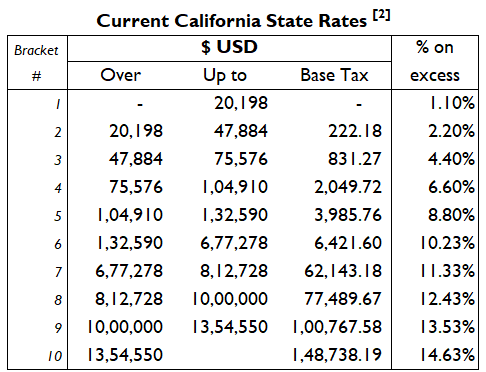

[2] Source: State of California Franchise Tax Board (2022). CALIFORNIA WITHHOLDING SCHEDULES FOR 2023. 2023 Withholding Schedules - Method B (INTERNET) Page 7. Retrieved on Dec 12th 2023.  Available at https://edd.ca.gov/siteassets/files/pdf_pub_ctr/23methb.pdf

In [4]:
# Calculating tax for retiree family in CA
import pandas as pd

# Function to calculate federal tax
def calculate_federal_tax(income):
    # Federal Tax Brackets
    brackets = [
        (0, 22000, 0.10),
        (22000, 89450, 0.12),
        (89450, 190750, 0.22),
        (190750, 364200, 0.24),
        (364200, 462500, 0.32),
        (462500, 693750, 0.35),
        (693750, float('inf'), 0.37)
    ]

    tax = 0
    income_remaining = income

    for lower_limit, upper_limit, rate in brackets:
        taxable_amount = min(upper_limit - lower_limit, income_remaining)
        tax += taxable_amount * rate
        income_remaining -= taxable_amount

        if income_remaining <= 0:
            break  # No more tax to calculate

    return tax

# Function to calculate CA state tax
def calculate_ca_tax(income):
    # California State Tax Brackets
    brackets = [
        (0, 20198, 0.011),
        (20198, 47884, 0.022),
        (47884, 75576, 0.044),
        (75576, 104910, 0.066),
        (104910, 132590, 0.088),
        (132590, 677278, 0.1023),
        (677278, 812728, 0.1133),
        (812728, 1000000, 0.1243),
        (1000000, 1354550, 0.1353),
        (1354550, float('inf'), 0.1463)
    ]

    tax = 0
    income_remaining = income

    for lower_limit, upper_limit, rate in brackets:
        taxable_amount = min(upper_limit - lower_limit, income_remaining)
        tax += taxable_amount * rate
        income_remaining -= taxable_amount

        if income_remaining <= 0:
            break  # No more tax to calculate

    return tax

# Function to calculate remaining balance
def calculate_remaining_balance(current_savings, current_ira, savings_interest_rate, ira_interest_rate, annual_expenses, num_years):
    # Constants
    MONTHS_IN_YEAR = 12

    # Monthly interest rates
    monthly_savings_interest = savings_interest_rate / MONTHS_IN_YEAR
    monthly_ira_interest = ira_interest_rate / MONTHS_IN_YEAR

    # Specify the path to the datasets
    data_path = "./data/"

    # Specify the filenames of the datasets
    inflation_rate_filename = "Inflation rate.csv"

    # Read the CSV file for inflation rates
    inflation_rate_df_data = pd.read_csv(data_path + inflation_rate_filename)

    # Create working copies of the dataframes for analysis
    inflation_rate_df = inflation_rate_df_data.copy()

    # Initializing variables
    remaining_balance = current_savings
    ira_balance = current_ira
    total_federal_tax_paid = 0  # Variable to add cumulative federal tax over the years
    total_ca_tax_paid = 0  # Variable to add cumulative CA state tax over the years

    for year in range(2023, 2023 + num_years):
        inflation_rate = inflation_rate_df.loc[year - 2023, 'Percentage Change']  # Fetching inflation rate for the current year
        annual_expense = annual_expenses * (1 + inflation_rate)

        for month in range(1, MONTHS_IN_YEAR + 1):
            # Calculating interest on IRA and Savings
            interest_on_ira = ira_balance * monthly_ira_interest
            interest_on_savings = remaining_balance * monthly_savings_interest

            # Calculating total income (only from savings account)
            income = interest_on_savings

            # Initializing tax variables before conditional statement
            federal_tax = 0
            ca_tax = 0

            # Paying taxes in April starting from April 2024
            if year >= 2024 and month == 4:
                annual_income_for_tax = calculate_annual_income_for_tax(income, month)
                federal_tax = calculate_federal_tax(annual_income_for_tax)
                ca_tax = calculate_ca_tax(annual_income_for_tax)
                total_federal_tax_paid += federal_tax  # Accumulate federal tax
                total_ca_tax_paid += ca_tax  # Accumulate CA state tax

            total_tax = federal_tax + ca_tax

            # Calculating expenses with inflation
            expenses = annual_expense / MONTHS_IN_YEAR

            # Calculating remaining balance after expenses and taxes
            remaining_balance = remaining_balance + income - expenses - total_tax

            # If remaining balance is negative, use IRA to cover the deficit
            if remaining_balance < 0:
                # Calculate additional federal tax on IRA withdrawal
                additional_tax_on_ira = calculate_federal_tax(ira_balance)
                total_tax += additional_tax_on_ira

                # Adjusting income and remaining balance
                income -= total_tax
                remaining_balance += ira_balance
                ira_balance = 0

            

            # Updating IRA balance with interest
            ira_balance += interest_on_ira

            # Printing results for the current month
            print(f"Year {year}, Month {month}:")
            print(f"Income: {income:.2f}")
            print(f"Expenses: {expenses:.2f}")
            print(f"Remaining Balance: {remaining_balance:.2f}")
            print(f"IRA Balance: {ira_balance:.2f}")
            print(f"Federal Tax: {federal_tax:.2f}")
            print(f"CA Tax: {ca_tax:.2f}")
            print(f"Total Tax: {total_tax:.2f}\n")

        # Updating annual_expenses for the next year
        annual_expenses *= (1 + inflation_rate)

    print("Projection complete.")

    # Output the total federal tax and CA state tax paid in the first 10 years
    print(f"Total Federal Tax Paid in the First 10 Years: {total_federal_tax_paid:.2f}")
    print(f"Total CA State Tax Paid in the First 10 Years: {total_ca_tax_paid:.2f}")

def calculate_annual_income_for_tax(savings_interest, month):
    # Calculate the annual income for tax based on the tax calculation period
    return savings_interest * 12 if month == 4 else savings_interest

# Getting user input
current_savings = float(input("Enter current savings balance: "))
current_ira = float(input("Enter current IRA balance: "))
savings_interest_rate = float(input("Enter annual interest rate for savings account (in %): ")) / 100
ira_interest_rate = float(input("Enter annual interest rate for IRA account (in %): ")) / 100
annual_expenses = float(input("Enter annual expenses: "))
num_years = int(input("Enter the number of years for projections: "))

# Calling the function to calculate and display projections
calculate_remaining_balance(current_savings, current_ira, savings_interest_rate, ira_interest_rate, annual_expenses, num_years)

Enter current savings balance: 580000
Enter current IRA balance: 400000
Enter annual interest rate for savings account (in %): 6
Enter annual interest rate for IRA account (in %): 8
Enter annual expenses: 81500
Enter the number of years for projections: 5
Year 2023, Month 1:
Income: 2900.00
Expenses: 7341.45
Remaining Balance: 575558.55
IRA Balance: 402666.67
Federal Tax: 0.00
CA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 2:
Income: 2877.79
Expenses: 7341.45
Remaining Balance: 571094.89
IRA Balance: 405351.11
Federal Tax: 0.00
CA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 3:
Income: 2855.47
Expenses: 7341.45
Remaining Balance: 566608.91
IRA Balance: 408053.45
Federal Tax: 0.00
CA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 4:
Income: 2833.04
Expenses: 7341.45
Remaining Balance: 562100.50
IRA Balance: 410773.81
Federal Tax: 0.00
CA Tax: 0.00
Total Tax: 0.00

Year 2023, Month 5:
Income: 2810.50
Expenses: 7341.45
Remaining Balance: 557569.55
IRA Balance: 413512.30
Federal Tax: 0.00
CA T